<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In this notebook we are creating Logistic Regression modal from scratch.

**About**

It is a supervised classification modal use to classify object between 2 classes based on probapility.
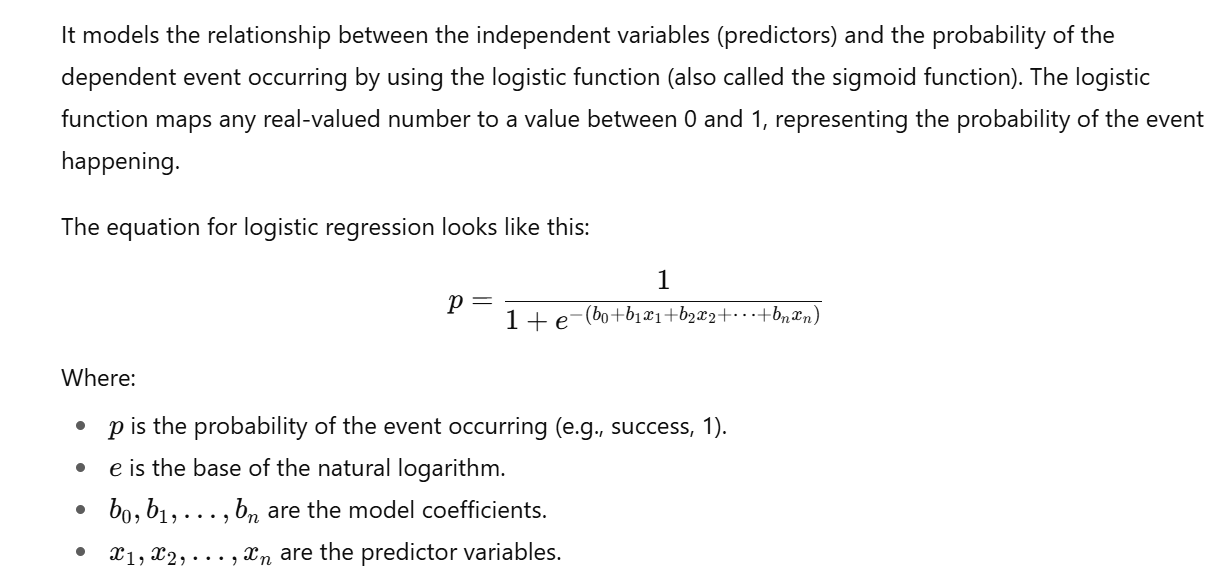

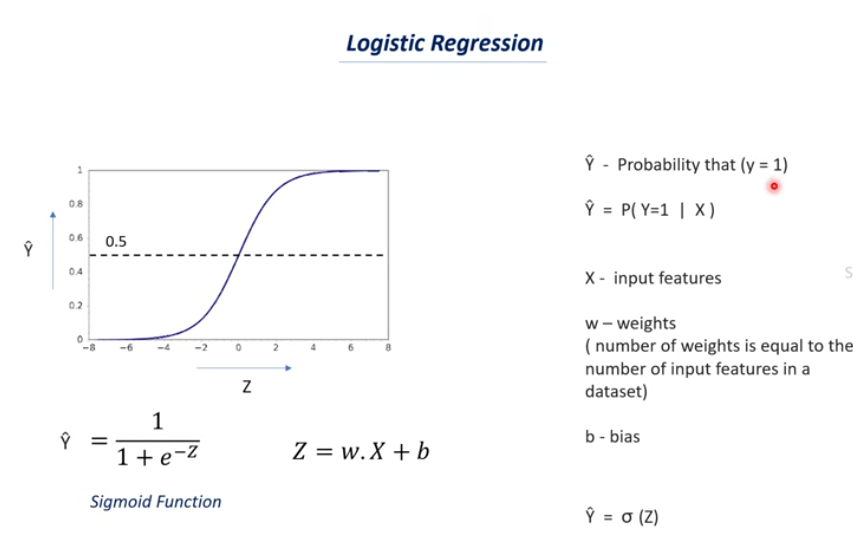

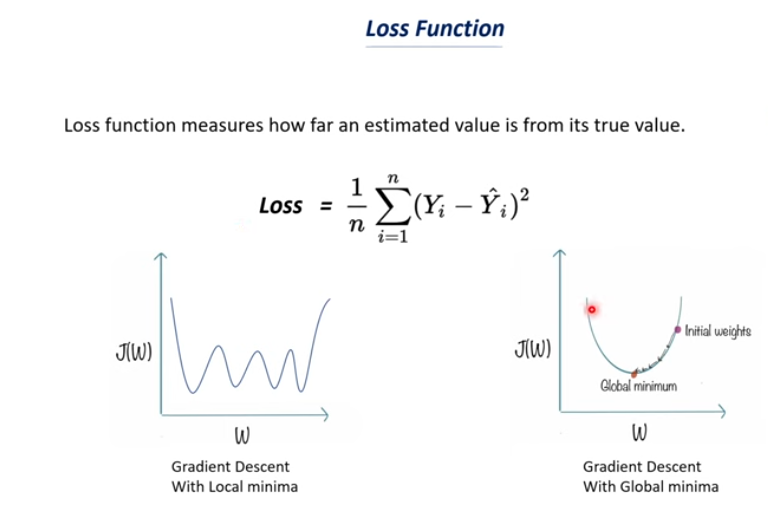

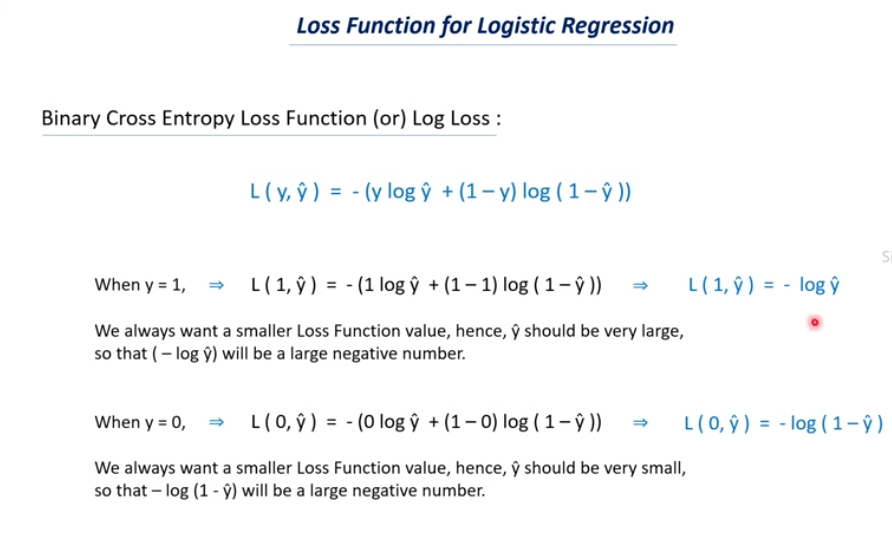

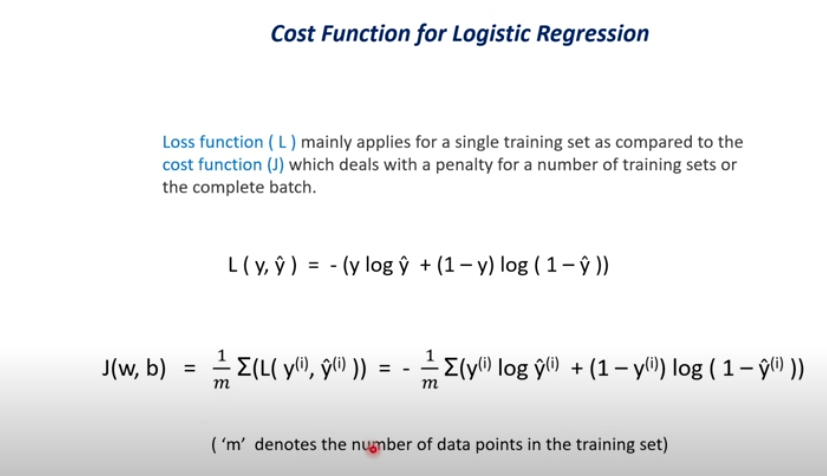

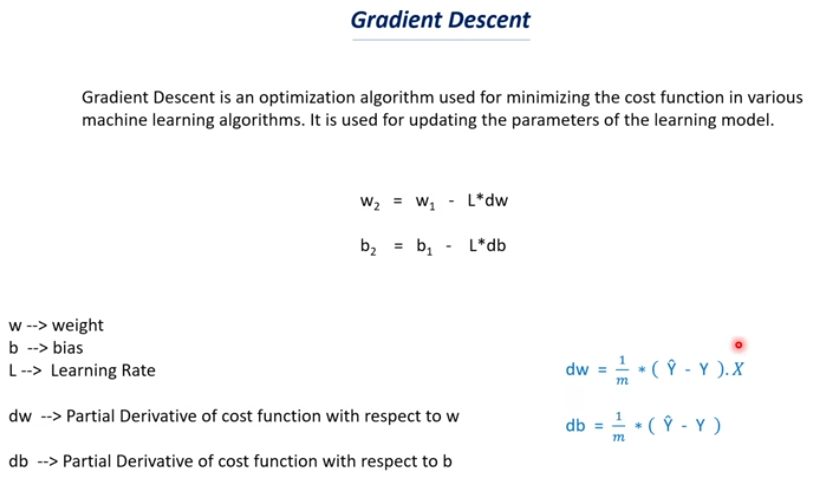

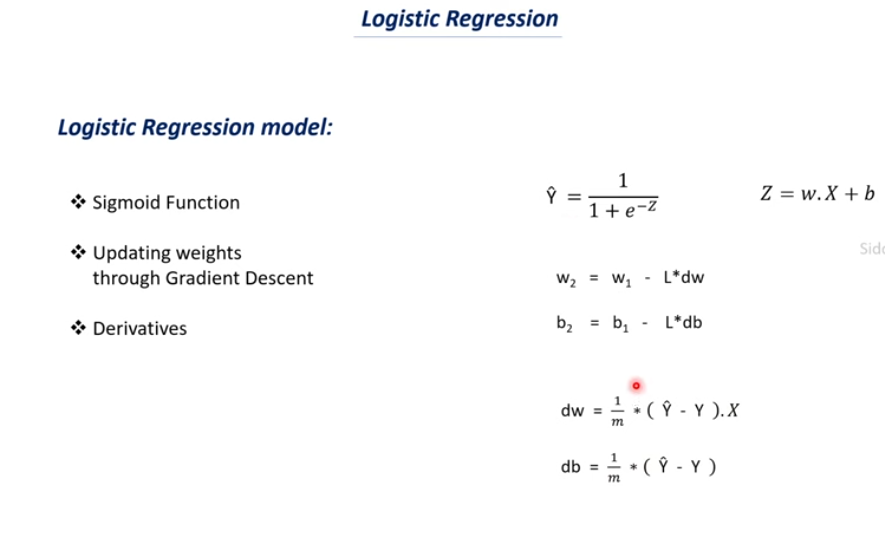

**Building Modal**

Importing Libraries

In [ ]:
import numpy as np

Logistic Regression

In [ ]:
class LogisticRegression():

#declaring learning_rate and no of iterations
  def __init__(self, learning_rate, no_of_iterations ):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


#fit function to fit data modal
  def fit(self, X, Y):

    self.rows , self.features = X.shape

    #initialise base and weights value
    self.weights = np.zeros(self.features)
    self.biase = 0

    self.X = X
    self.Y = Y

    # implement gradient descent
    for i in range(self.no_of_iterations):
      self.updateWeights()



  def updateWeights(self):
    # Y_hat formula (sigmoid formula)
    Y_hat = 1 / (1 + np.exp(- (self.X.dot(self.weights)+self.biase)))


    dw = (1 / self.features) * np.dot(self.X.T, (Y_hat - self.Y))

    db = (1 / self.features) * np.sum(Y_hat - self.Y)

    # updating weights and biase

    self.weights = self.weights - self.learning_rate * dw
    self.biase = self.biase - self.learning_rate * db

    #sigmoid function and Decision Boundary
  def predict(self,X):

    Y_pred = 1 / (1 + np.exp(- (X.dot(self.weights)+self.biase)))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)

    return Y_pred



**Implementing Logistic Regression Modal**

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Load Database

In [ ]:
diabetes_database = pd.read_csv("/content/drive/MyDrive/Databases /diabetes.csv")

In [ ]:
diabetes_database.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_database.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_database.shape

(768, 9)

In [ ]:
diabetes_database.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_database["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non Diabitic

1 --> Diabitic

In [ ]:
diabetes_database.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
features = diabetes_database.drop(columns = "Outcome", axis = 1)
target = diabetes_database["Outcome"]

In [ ]:
print (features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Data Standardisation**

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform( features)


Train - Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(standardized_data, target, test_size = 0.2, random_state = 2, stratify=target)

In [ ]:
print("Features: ",features.shape ,"\nX_train :", X_train.shape, "\n X_test:", X_test.shape,
      "\nY_train :", Y_train.shape, "\n Y_test:", Y_test.shape)

Features:  (768, 8) 
X_train : (614, 8) 
 X_test: (154, 8) 
Y_train : (614,) 
 Y_test: (154,)


Training the modal

In [ ]:
classifier = LogisticRegression(learning_rate = 0.01, no_of_iterations=1000)
classifier.fit(X_train, Y_train)

Model Evaluation

In [ ]:
# evaluating model on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy score of training data :\t",training_data_accuracy )

Accuracy score of training data :	 0.7833876221498371


In [ ]:
# evaluating model on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of test data :\t", test_data_accuracy)

Accuracy score of test data :	 0.7597402597402597
